In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = {
    'review': [
        "I love this product! It works great and arrived on time.",
        "Absolutely terrible. It broke after one use.",
        "Fantastic quality. Highly recommend to everyone.",
        "Not what I expected. Very disappointed.",
        "Exceeded my expectations. Will buy again!",
        "Worst purchase ever. Waste of money.",
        "Product is okay, but delivery was delayed.",
        "Very satisfied. Great value for the price.",
        "Terrible experience. Customer service was rude.",
        "Amazing! I'm so happy with this."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.3, random_state=42
)


In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test_tfidf)

In [8]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

🔹 Accuracy: 0.0

🔹 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       3.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



c:\Users\thimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\thimm\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

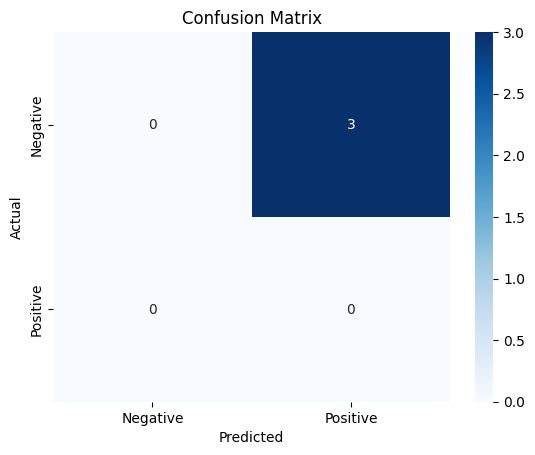

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()